# Import libraries

In [1]:
pip install sklearn

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 23.2 MB 4.9 MB/s            
     |████████████████████████████████| 306 kB 23.7 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=cb07fb49e8a26509f9b14de11ece4b2c6099adae758d7082f9db477f2d8d828b
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas


     |████████████████████████████████| 11.3 MB 4.7 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.7 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install sklearn-genetic

     |████████████████████████████████| 160 kB 5.3 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [21]:
#Import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from genetic_selection import GeneticSelectionCV
from sklearn.metrics import r2_score

# Choose your data, model, split size and hyperparameters:

## Data 
You should pass to `file_name` full name of the file with data. Data must be in the same folder. First column should contain the index, the middle columns should contain variables and the last column - the output. 

## Model type
You should pass to `model_type` the type of model chosen from: 
1. 'MLR' - for Multi Linear Regression
2. 'KNN' - for K-Nearest Neighbors Regression
3. 'RF' - for Random Forest Regression
4. 'SVR' - for Support Vector Regression 
5. 'DTR' - for Decision Tree Regression

## Split size
You should pass to `split_size` number between 0.0 and 1.0 that represents the proportion of the dataset to include in the test dataset. If int, represents the absolute number of test samples. Example: split_size = 0.33 means 77% of data is in train set and 33% in test set. 


## Hyperparameters
You can adjust hyperparameters for the model you have chosen:

#### DTR - hyperparameters:
- **criterion**: {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”} - The function to measure the quality of a split. Supported criteria are “squared_error” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, “absolute_error” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and “poisson” which uses reduction in Poisson deviance to find splits.
- **splitter**: {“best”, “random”} - the strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.



#### SVR - hyperparameters:
- **kernel**: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} - Specifies the kernel type to be used in the algorithm.
- **C**: float - Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
- **epsilon**: float - Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

#### RF - hyperparameters:
- **n_estimators** : int - The number of trees in the forest.
- **max_depth** : int - The maximum depth of the tree. 
- **min_samples_split** : int - The minimum number of samples required to split an internal node.
- **min_samples_leaf** : int - The minimum number of samples required to be at a leaf node. 
- **max_features** : {“auto”, “sqrt”, “log2”} - The number of features to consider when looking for the best split. If “auto”, then max_features=n_features. If “sqrt”, then max_features=sqrt(n_features). If “log2”, then max_features=log2(n_features).

#### KNN - hyperparameters:
- **n_neighbors** : Number of neighbors to use by default for kneighbors queries.
- **metric** : The distance metric to use for the tree. It is a measure of the true straight line distance between two points in Euclidean space.

#### GA - hyperparameters:
- **n** : int - number of columns that's should stay after GA.

In [81]:
### Cell for user input ### 

file_name = 'dane.csv'
model_type = 'SVR' 
split_size = 0.33 

#hyperparameters
criterion,splitter = 'squared_error','best' #used when model_type is 'DTR'

kernel, C, epsilon = 'linear', 1, 10  #used when model_type is 'SVR'

n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features = 200, 20, 2, 2, 'sqrt' #used when model_type is 'RF'

n_neighbors,metric = 5,'Euclidean' # used when model_type is 'KNN'

n=2 # Used when database has more then 10 features

In [82]:

df = pd.read_csv(file_name)

predictions = pd.DataFrame() 

X, y = df.drop(columns=['y']).to_numpy(), df['y'].to_numpy()

scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = split_size, random_state=1)

if(len(X_train[0])>9):
    model_type = 'GA'
def GA_model(X_train,y_train,X_test,n):
    estimator = linear_model.LinearRegression()

    selector = GeneticSelectionCV(estimator,cv=5,
                                      verbose=1,
                                      scoring="r2",
                                      max_features=n,
                                      n_population=50,
                                      crossover_proba=0.5,
                                      mutation_proba=0.2,
                                      n_generations=40,
                                      crossover_independent_proba=0.5,
                                      mutation_independent_proba=0.05,
                                      tournament_size=3,
                                      n_gen_no_change=10,
                                      caching=True,
                                      n_jobs=-1)

    
    selector = selector.fit(X_train, y_train)
    return(selector)

#Model MLR
def MLR_model(X_train,X_test,y_train):
    MLR = LinearRegression()
    MLR = MLR.fit(X_train, y_train)
    y_pred = MLR.predict(X_test)
    y_pred_train = MLR.predict(X_train)
    predictions['MLR'] = y_pred

    return(MLR)

#Model KNN
def KNN_model(X_train,X_test,y_train, n_neighbors, metric):
    KNN = KNeighborsClassifier()
    KNN = KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    y_pred_train = KNN.predict(X_train)

    reurn(KNN)

# Model RF
def RF_model(X_train, X_test, y_train, n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    RF = ensemble.RandomForestRegressor()
    RF = RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    y_pred_train = RF.predict(X_train)
    predictions['RF'] = y_pred
    #predictions['SVR'] = y_pred
    
    return RF


# Model SVR
def SVR_model(X_train, X_test, y_train, kernel, C, epsilon):
    SVR = svm.SVR(kernel=kernel, C=C, epsilon=epsilon)
    SVR = SVR.fit(X_train, y_train)
    y_pred = SVR.predict(X_test)
    y_pred_train = SVR.predict(X_train)
    
    return SVR

    
# Model DTR
def DTR_model(X_train,X_test,y_train,criterion1, splitter1):
    DTR = tree.DecisionTreeRegressor(criterion=criterion1,splitter= splitter1)
    DTR = DTR.fit(X_train, y_train)
    y_pred = DTR.predict(X_test)
    y_pred_train = DTR.predict(X_train)

    return(DTR)

In [83]:
def leverage(X_test):
    X = []

    for i in range(len(X_test)):
        Y = [1]+[X_test[i][j] for j in range(len(X_test[i]))]
        X.append(Y)
    X = np.array(X)
    X = np.asmatrix(X)  
    XT = X.transpose()
    XX1 = np.linalg.inv(np.dot(XT,X))
    H = np.dot(np.dot(X,XX1),XT)
    hi = [np.asarray(H)[i][i] for i in range(len(np.asarray(H)))]
    return(hi)

def std_res(y_pred,y_test,hi):
    std_res = []
    for i in range(len(y_pred)):
        std_res.append(y_test[i]/(y_pred[i]*np.sqrt(1-hi[i])))
    return(std_res)

if(model_type == 'DTR'):
    model = DTR_model(X_train,X_test,y_train,criterion,splitter)
elif(model_type == 'SVR'):
    model = SVR_model(X_train, X_test, y_train, kernel, C, epsilon)
elif(model_type == 'RF'):
    model = RF_model(X_train, X_test, y_train, n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features)
elif(model_type == 'GA'):
    model = GA_model(X_train,y_train,X_test,n);

In [84]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
hi= leverage(X_test)
std_res1 = std_res(y_pred,y_test,hi)
hi_train = leverage(X_train)
std_res2 = std_res(y_pred_train,y_train,hi_train)
print('RMSE = ',mean_squared_error(y_test, y_pred,squared=False),' R^2 = ', r2_score(y_test,y_pred))

RMSE =  19.352488482902594  R^2 =  0.8993180845687501


Text(0, 0.5, 'Standardized Residuals')

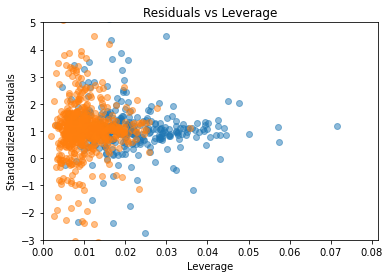

In [85]:
plot_lm_4 = plt.figure()
plt.scatter(hi, std_res1, alpha=0.5)
plt.scatter(hi_train, std_res2, alpha=0.5)
plot_lm_4.axes[0].set_xlim(0, max(hi)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')


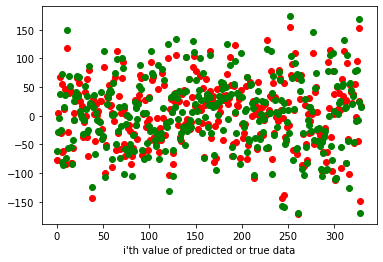

In [88]:
x = [i for i in range(len(y_pred))]
plt.scatter(x,y_pred, color = 'red')
plt.scatter(x,y_test, color = 'green')
plt.xlabel("i'th value of predicted or true data")
plt.ylabel("Value of explained variables")
plt.show()